<a href="https://colab.research.google.com/github/hamza3laa/-Hierarchical-Clustering-/blob/main/Clustering_with_k_means_Guide_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning | Clustering (K-Means)

Unsupervised Learning, a part of machine learning where no response variable is present to provide guidelines in the learning process and data is analyzed by algorithms itself to identify the trends. 

typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

It is a known fact that the data and information are usually obscured by noise and redundancy so making it into groups with similar features is the decisive action to bring some insights.

One of the excellent methods in unsupervised machine learning treated for data classification, k-means
The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”






## Clustering (K-Means) How it works?
It tries to find cluster centers that are representative of certain regions of the data.
 The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it. The algorithm is finished when the assignment of
instances to clusters no longer changes.


The algorithm proceeds in two alternating parts: In the Reassign Points step, we assign every point in the data to the cluster whose centroid is nearest to it. In the Update Centroids step, we recalculate each centroid's location as the mean (center) of all the points assigned to its cluster.
 We then iterate these steps until the centroids stop moving, or equivalently until the points stop switching clusters.

**Clustering is considered to be best if it has maximum intercluster distance and minimum intracluster distance.**

In other words maxmizing between clusters sum squars [BCSS] and minmizaing witthn clusters sum squared [WCSC]


# viusalizaing K means 
(https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

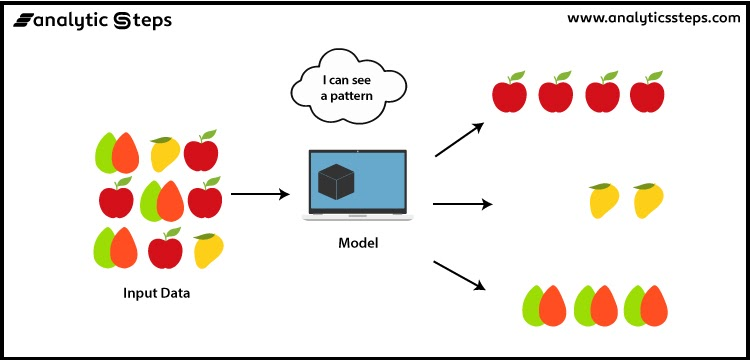

# Steps that K-means Alograthims apply 

1. Choose the number ‘K’ of clusters
(let K = 3).
2. Select at random ‘K’ points, the
centroids (not necessary from your
dataset).
3. Assign each data point to the
closest centroid.
4. Calculate the mean of each cluster
and move the centroids.
5. Repeat steps 3 & 4 until
convergence ((there is no change in
each cluster)

## Applications:
• Market / Customer Segmentation.

• Social Network Analysis

• Image Segmentation (Object Detection)

## Certain factors can impact the efficacy of the final clusters formed when using k-means clustering.
1. Number of clusters (K): The number of clusters you want to group your data points into, has to be predefined.

2. Initial Values/ Seeds: Choice of the initial cluster centres can have an impact on the final cluster formation. The K-means algorithm is non-deterministic. This means that the outcome of clustering can be different each time the algorithm is run even on the same data set.*italicized text*

3. Outliers: Cluster formation is very sensitive to the presence of outliers. Outliers pull the cluster towards itself, thus affecting optimal cluster formation.

4. Distance Measures: Using different distance measures (used to calculate distance between a data point and cluster centre) might yield different clusters.

5. The K-Means algorithm does not work with categorical data.

6. The process may not converge in the given number of iterations. You should always check for convergence.

# Tow major factors would affect the effiacncy of my cluster 
 ## - Getting The Optimal Number Of Clusters
 ## - Initaion of the centroids 

#  Getting The Optimal Number Of Clusters
## 1. Elbow Curve Method
- Calculate average distances to the centroid within each cluster across all data points.
- Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).


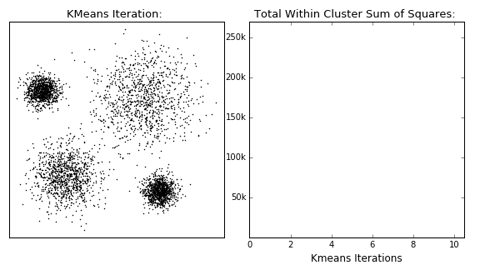

## 2. Silhouette analysis.
- The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

S(i) is the silhouette coefficient of the data point i.

a(i) is the average distance between i and all the other data points in the cluster to which i belongs.

b(i) is the average distance from i to all clusters to which i does not belong.

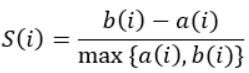

We will then calculate the average_silhouette for every k.
Avg silhouette
Then plot the graph between average_silhouette and K.

Points to remember while calculating silhouette coefficient:
The value of the silhouette coefﬁcient is between [-1, 1].
A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
The worst value is -1. Values near 0 denote overlapping clusters.


### Other method is dunn index
Dunn index also takes into account the distance between two clusters. This distance between the centroids of two different clusters is known as inter-cluster distance. 


Dunn index is the ratio of the minimum of inter-cluster distances and maximum of intracluster distances.

We want to maximize the Dunn index. The more the value of the Dunn index, the better will be the clusters.

## What are the shortcomings of k-means clustering?
It is difficult to predict the correct number of centroids (k) to partition the data.

The algorithm always divides the space into k clusters, even when the partitions don’t make sense.

The initial positions of the k centroids can affect the results significantly.

It does not work well when the expected clusters differ in size and density.

Since it is a centroid-based approach, outliers in the data can drag the centroids to inaccurate centers.

Since it is a hard clustering method, clusters cannot overlap.

It is sensitive to the scale of the dimensions, and rescaling the data can change the results significantly.

It uses the Euclidean distance to divide points. The Euclidean distance becomes ineffective in high dimensional spaces since all points tend to become uniformly distant from each other. 

The centroid is an imaginary point in the dataset and may be meaningless.
Categorical variables cannot be defined by a mean and should be described by their mode.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Loading & Inspecting Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data & check what's inside

df = pd.read_csv ('/content/drive/MyDrive/Machine learning/Mostfa othman course/Clustering materials /marketing-segmentation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


### Exploring Data

In [ ]:
X= df.values
X[: , 1]

array([-1.33, -0.28, -0.99, -0.29,  1.06, -1.66, -0.97, -0.32,  1.02,
        0.68, -0.34,  0.39, -1.69,  0.67,  0.27,  1.36,  1.38,  1.36,
       -0.34,  0.67,  1.18, -1.69,  1.04, -0.96,  1.03, -0.99,  0.37,
        0.03, -1.36,  0.73])

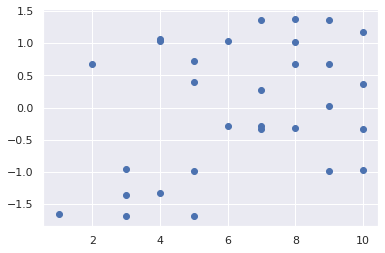

In [ ]:
plt.scatter(X[: , 0] , X[: , 1])


### Data Preprocessing

In [ ]:
from 

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


### Model Training & Prediction

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(random_state=42)

In [ ]:
y_clustred = model.fit_predict(X)

In [ ]:
model.cluster_centers_

array([[ 2.5       , -1.4175    ],
       [ 7.8       ,  0.824     ],
       [ 6.6       ,  0.078     ],
       [ 9.66666667, -0.76666667],
       [ 4.5       ,  0.805     ],
       [ 2.        ,  0.67      ],
       [ 9.4       ,  0.722     ],
       [ 4.66666667, -1.33666667]])

In [ ]:
model.labels_

array([7, 2, 7, 2, 4, 0, 3, 1, 1, 1, 3, 4, 7, 5, 2, 6, 1, 1, 2, 6, 6, 0,
       4, 0, 2, 3, 6, 6, 0, 4], dtype=int32)

In [ ]:
model.inertia_

14.263521666666666

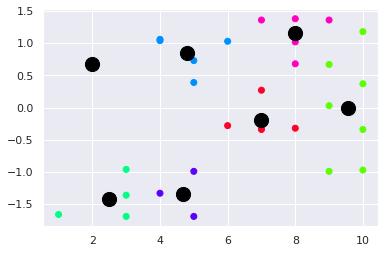

In [ ]:
plt.scatter(X[: , 0] , X[: , 1] , c = model.labels_ , cmap='gist_rainbow_r')
plt.scatter(model.cluster_centers_[: ,0] , model.cluster_centers_[: ,-1] , s=200 , c= 'black');


### Finding the Optimal Number of Clusters (Elbow / Knee Method)

---



In [ ]:
Sum_squared_distance = []
for i in range(1,8):
  model = KMeans(n_clusters=i ,random_state = 42)
  model.fit_predict(X)
  Sum_squared_distance.append(model.inertia_)
Sum_squared_distance

[229.16347000000002,
 74.51511402714932,
 50.34286916666667,
 35.140106071428576,
 26.861604166666666,
 22.988819285714285,
 17.773116904761903]

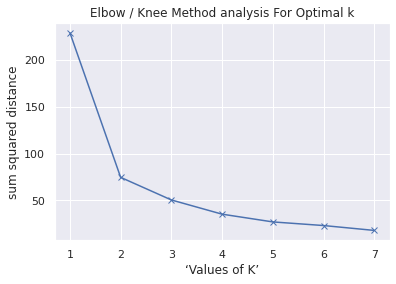

In [ ]:
plt.plot(range(1,8) ,  Sum_squared_distance ,'bx-')
plt.xlabel('‘Values of K’')
plt.ylabel('sum squared distance') 
plt.title('Elbow / Knee Method analysis For Optimal k')
plt.show()

Based on the abov graph 

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 2)
y_clustred = model.fit_predict(X)
y_clustred


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
df_clustred = df.copy()
df_clustred['Clustred'] = y_clustred
df_clustred.head(1)

,Satisfaction,Loyalty,Clustred
0,4,-1.33,1


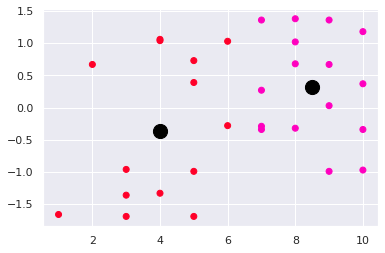

In [ ]:
plt.scatter(X[: , 0] , X[: , 1] , c = model.labels_ , cmap='gist_rainbow_r')
plt.scatter(model.cluster_centers_[: ,0] , model.cluster_centers_[: ,-1] , s=200 , c= 'black');


In [ ]:
model.inertia_

49.46793333333333

### Finding the Optimal Number of Clusters using  silhouette coefficient

---



In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2 , 8):
  model = KMeans(n_clusters=i , random_state=42)
  model.fit(X)
  silhouette_avg.append(silhouette_score(X, model.labels_))

silhouette_avg

[0.5316993437803563,
 0.3941520547110162,
 0.3715220933956895,
 0.37741042524589624,
 0.3599016111291723,
 0.3828989941211511]

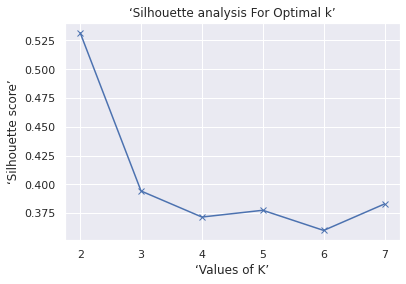

In [ ]:
plt.plot(range(2,8),silhouette_avg , 'bx-')
plt.xlabel('‘Values of K’')
plt.ylabel('‘Silhouette score’') 
plt.title('‘Silhouette analysis For Optimal k’')
plt.show()

### In Elbow method as well as silhouette coefficient we can conclude that optimum ckusters is 2 

#  Initaion of the centroids
Remember how we randomly initialize the centroids in k-means clustering? Well, this is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called **K-Means++** that can be used to choose the initial values, or the initial cluster centroids, for K-Means.


## The steps to initialize the centroids using K-Means++ :

The first cluster is chosen uniformly at random from the data points that we want to cluster. This is similar to what we do in K-Means, but instead of randomly picking all the centroids, we just pick one centroid here

Next, we compute the distance (D(x)) of each data point (x) from the cluster center that has already been chosen

Then, choose the new cluster center from the data points with the probability of x being proportional to (D(x))2

We then repeat steps 2 and 3 until k clusters have been chosen


We can continue with the K-Means algorithm after initializing the centroids. Using K-Means++ to initialize the centroids tends to improve the clusters. Although it is computationally costly relative to random initialization, subsequent K-Means often converge more rapidly.

==========

# GOOD LUCK!